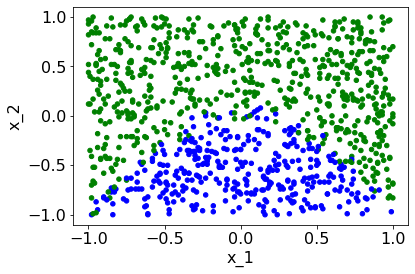

In [88]:
import numpy as np
from matplotlib import cm
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as matlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('week2.csv', skiprows=[0], header = None,keep_default_na=False)
df.columns = ["x_1","x_2","y"]
Xtest = df.iloc[:,0:2]
X1=df.iloc[:,0]
X2=df.iloc[:,1]
y=df.iloc[:,2]
X=np.column_stack((X1,X2))
colors = np.where(df["y"]==1,'blue','green')
plt.rc('font', size =16)
#df.plot.scatter(x="x_1",y="x_2", color=y, colormap='jet')
df.plot.scatter(x="x_1",y="x_2", c = colors)
df.isnull();


In [90]:
clf = LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = clf.fit(X, y)

# Predict
prediction_result = clf.predict([(0.1,0.5)])
print(prediction_result)